# Sentiment Analysis (using BoW)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [2]:
PATH = "../../../Natural_Language_Processing/NLP/Python/Restaurant_Reviews.tsv"

In [3]:
dataset = pd.read_csv(PATH, delimiter='\t', quoting=3)

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Text Cleaning

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_new = stopwords.words('english')
stopwords_new.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pritthijit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import re
from nltk.stem.porter import PorterStemmer

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords_new)]
    text = ' '.join(text)
    return text

In [7]:
corpus = []
column = 'Review'
for i in range(len(dataset)):
    review = clean_text(dataset[column][i])    
    corpus.append(review)

In [8]:
corpus[:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

## Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [10]:
import math
max_features = (int)(math.floor(len(X[0]) / 100) * 100)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=max_features)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

## Naïve Bayes Classification

In [13]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predictions

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_test.reshape(-1,1)[:5], y_pred.reshape(-1,1)[:5]), axis=1))

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


## Metrics

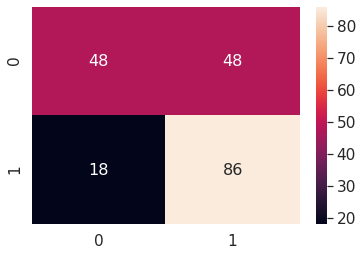

In [15]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.67

## Improvements
- Try excluding more negative stopwords like isn't, aren't, etc.